In [2]:
import pandas as pd
import networkx as nx

In [3]:
G = nx.read_edgelist('../networkx_df.csv', comments='#',
                     create_using=nx.DiGraph(), 
                     delimiter=',', 
                     nodetype=int, 
                     encoding='utf-8')

# Basic Centrality of the Graph

### Degree Centrality

In [4]:
deg_cen = nx.degree_centrality(G)
in_deg_cen = nx.in_degree_centrality(G)
out_deg_cen = nx.out_degree_centrality(G)

In [5]:
type(deg_cen)

dict

In [6]:
deg_cen

{1385933370090209280: 0.00011138338159946537,
 158095776: 0.0020049008687903764,
 1416535505454338050: 0.00022276676319893073,
 544695802: 0.00011138338159946537,
 716257068538327040: 0.00011138338159946537,
 258170457: 0.00022276676319893073,
 2817389862: 0.00011138338159946537,
 822476228548403200: 0.00011138338159946537,
 2353730881: 0.00011138338159946537,
 921026239808208896: 0.00011138338159946537,
 720934098223542272: 0.00011138338159946537,
 2922779039: 0.00011138338159946537,
 552891173: 0.00011138338159946537,
 982496635: 0.00011138338159946537,
 1433403537329819654: 0.00011138338159946537,
 1175052073605353473: 0.00011138338159946537,
 2784661153: 0.00011138338159946537,
 102887506: 0.00011138338159946537,
 18681111: 0.0051236355535754065,
 952980338745147394: 0.00011138338159946537,
 1438871779779530755: 0.00011138338159946537,
 46975259: 0.00011138338159946537,
 1157395568135557120: 0.00022276676319893073,
 563064119: 0.0003341501447983961,
 979827806023618560: 0.000111383

In [7]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

In [8]:
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [9]:
L = G.size()
degrees = [G.degree(node) for node in G]
kmin = min(degrees)
kmax = max(degrees)

# Get 10 logarithmically spaced bins between kmin and kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)


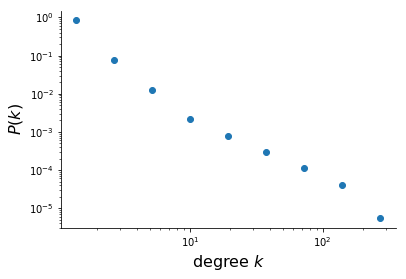

In [14]:
fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

In [10]:
deg_cen

{1385933370090209280: 0.00011138338159946537,
 158095776: 0.0020049008687903764,
 1416535505454338050: 0.00022276676319893073,
 544695802: 0.00011138338159946537,
 716257068538327040: 0.00011138338159946537,
 258170457: 0.00022276676319893073,
 2817389862: 0.00011138338159946537,
 822476228548403200: 0.00011138338159946537,
 2353730881: 0.00011138338159946537,
 921026239808208896: 0.00011138338159946537,
 720934098223542272: 0.00011138338159946537,
 2922779039: 0.00011138338159946537,
 552891173: 0.00011138338159946537,
 982496635: 0.00011138338159946537,
 1433403537329819654: 0.00011138338159946537,
 1175052073605353473: 0.00011138338159946537,
 2784661153: 0.00011138338159946537,
 102887506: 0.00011138338159946537,
 18681111: 0.0051236355535754065,
 952980338745147394: 0.00011138338159946537,
 1438871779779530755: 0.00011138338159946537,
 46975259: 0.00011138338159946537,
 1157395568135557120: 0.00022276676319893073,
 563064119: 0.0003341501447983961,
 979827806023618560: 0.000111383

In [11]:
df = pd.DataFrame.from_dict(deg_cen, orient="index")

In [12]:
df.to_csv("degree_centrality_confirmed.csv")

In [13]:
df = pd.DataFrame.from_dict(in_deg_cen, orient="index")
df.to_csv("in_degree_centrality_confirmed.csv")

In [14]:
df = pd.DataFrame.from_dict(out_deg_cen, orient="index")
df.to_csv("out_degree_centrality_confirmed.csv")

In [15]:
eigenvector_cen = nx.eigenvector_centrality(G)

In [16]:
df = pd.DataFrame.from_dict(eigenvector_cen, orient="index")
df.to_csv("eigenvector_centrality_confirmed.csv")

In [17]:
betweenness = nx.betweenness_centrality(G,k=None, normalized=False)

In [18]:
df = pd.DataFrame.from_dict(betweenness, orient="index")
df.to_csv("betweenness_centrality_not_normalized_confirmed.csv")

In [19]:
H = nx.read_edgelist('../networkx_df.csv', comments='#',
                     create_using=nx.Graph(), 
                     delimiter=',', 
                     nodetype=int, 
                     encoding='utf-8')

In [20]:
betweenness = nx.betweenness_centrality(H,k=None, normalized=False)

In [21]:
df = pd.DataFrame.from_dict(betweenness, orient="index")
df.to_csv("betweenness_centrality_not_normalized_not_directed_confirmed.csv")

In [26]:
df.head()

,0
1385933370090209280,0.000000
158095776,489599.065491
1416535505454338050,346788.000000
544695802,0.000000
716257068538327040,0.000000


In [24]:
missed = pd.read_csv("../Missed_nodes.csv")

In [25]:
missed.head()

,Unnamed: 0,Source,Target,Weight,Target,Weight,_merge
0,83009,467817388,196717787,1,NaN,NaN,left_only
1,83010,3135148227,196717787,1,NaN,NaN,left_only
2,83011,872810605,196717787,2,NaN,NaN,left_only
3,83012,271504586,196717787,1,NaN,NaN,left_only
4,83013,306967462,196717787,1,NaN,NaN,left_only


In [30]:
missed = missed.set_index("Source")

In [31]:
pd.merge(df, missed, left_index=True, right_index=True)

,0,Unnamed: 0,Target,Weight,Target,Weight,_merge
467817388,0.0,83009,196717787,1,NaN,NaN,left_only
3135148227,0.0,83010,196717787,1,NaN,NaN,left_only
872810605,0.0,83011,196717787,2,NaN,NaN,left_only
271504586,0.0,83012,196717787,1,NaN,NaN,left_only
306967462,0.0,83013,196717787,1,NaN,NaN,left_only
3299469609,0.0,83014,196717787,1,NaN,NaN,left_only
1225848216467509248,0.0,83015,196717787,1,NaN,NaN,left_only
259388196,0.0,83016,196717787,1,NaN,NaN,left_only
525910396,0.0,83017,196717787,1,NaN,NaN,left_only
358143304,0.0,83018,196717787,1,NaN,NaN,left_only
